# AgentPy Workshop

<p>
<a href="https://mybinder.org/v2/gh/JoelForamitti/agentpy_workshop/HEAD" rel="noopener" target="_blank", style="float: left; padding-right:4px"><img src="https://mybinder.org/badge_logo.svg" alt="Binder"></a>
<a href="https://agentpy.readthedocs.io/en/latest/" rel="noopener" target="_blank"><img src="https://img.shields.io/badge/read_the-documentation-red?logo=read-the-docs" alt="Documentation", style="float: left; padding-right:4px"></a> 
<a href="https://img.shields.io/github/license/JoelForamitti/agentpy_workshop" rel="noopener" target="_blank"><img src="https://img.shields.io/badge/edit_on-GitHub-blueviolet?logo=github" alt="GitHub", style="float: left; padding-right:4px"></a>
</p>

This interactive notebook will guide you through the development of an agent-based model with the [AgentPy](https://agentpy.readthedocs.io) package (v0.1.5). 
To run this workshop in a virtual environment, you can launch this notebook in [binder]([![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/JoelForamitti/agentpy_workshop/HEAD)).

## 1. Introduction

**Agent-based models** (ABMs) are computer simulations to generate and understand the dynamics of [complex systems](https://complexityexplained.github.io/) based on the autonomous behavior of heterogeneous agents. They show how the behavior of a system as a whole can emerge out of the actions and interactions of individual agents, each with their own set of rules, characteristics, and information. This method has found numerous applications in fields like [ecology](https://doi.org/10.3389/fevo.2018.00237), [cognitive sciences](https://doi.org/10.1177/0963721419834547), [management](https://oxford.universitypressscholarship.com/view/10.1093/acprof:oso/9780195172119.001.0001/acprof-9780195172119), 
[economics](https://www.nature.com/articles/460685a), and [sociology](https://doi.org/10.1002/wics.1356).

**AgentPy** is an open-source library for the development and analysis of agent-based models in Python. The framework integrates the tasks of model design, numerical experiments, and data analysis within a single environment, and is optimized for interactive computing with [IPython](http://ipython.org/) and [Jupyter](https://jupyter.org/). If you have questions or ideas for improvements, please visit the [discussion forum](https://github.com/JoelForamitti/agentpy/discussions).

Within this framework, **agents** are represented as [objects](https://www.programiz.com/python-programming/class) that can be placed within different **environments** like a network or a spatial grid. A **model** is used to initiate these objects, perform a simulation, and record data. **Experiments** can take a model and run it over multiple iterations with different parameter combinations. The resulting **output data** can be saved, loaded, and re-arranged for analysis and visualization.

<img src="structure.png" alt="drawing" width="500"/>

**This workshop** will introduce you to the basic syntax of the agentpy package. Some basic knowledge of Python is required, but it is generally aimed at beginners. The following sections will show you how to design custom agents and models; use networks; visualize the dynamics of a simulation in an animation, perform experiments that run a model multiple times with different parameters; and run a sensitivity analysis on the output data. For more information about agentpy, check out the [documentation](https://agentpy.readthedocs.io/) and [model library](https://agentpy.readthedocs.io/en/latest/model_library.html). 

## 2. Basic Syntax
### Let's get started

Below you can see the first *code cell* of this notebook, which you can edit yourself. Here are some basic functionalities of Jupyter:

- You can navigate between cells with your keyboard arrows or by clicking on a cell. 
- You can switch between *Command Mode* the *Edit Mode* with `Enter` and `Esc`. 
- In Command Mode, you can create a new cell below with the command `b` and delete a cell with `d` `d`. 
- To *run* a selected cell, click on the `►` button at the top or use the keyboard combination `Shift` + `Enter`. 
- If the [kernel](https://ipython.org/ipython-doc/3/development/kernels.html) crashes, you can restart it with the `↻` button. 

For more information about how to use Jupyter, [click here](https://realpython.com/jupyter-notebook-introduction/).

In [1]:
print('Hello World!')

Hello World!


For this workshop, we have to install the required packages `agentpy` and `seaborn`. On binder, this has already happened automatically. If you are running this workshop on your local machine, you can use the following command (remove the # to use the command):

In [2]:
# !pip install -r requirements.txt 

We can now import the agentpy library as follows:

In [3]:
import agentpy as ap

### Creating custom agents

Let us first understand the basics of object-oriented programming. **Objects** are a collection of variables and methods. Every object has a type, which refers to the class that has been used to create the object. **Classes** can be seen as a *building instruction* for new objects. You can learn more about classes and objects [here](https://www.programiz.com/python-programming/class). 

To create an agent-based model in agentpy, we create a new instance of the class [`ap.Model`](https://agentpy.readthedocs.io/en/latest/reference_model.html):

In [4]:
model = ap.Model()

The model is currently empty. To fill it with agents, we need to create a custom class as a *child* of [`Agent`](https://agentpy.readthedocs.io/en/latest/reference_agents.html). This means that our custom agent will inherit all basic agent functionalities from its *parent* class. You can find the description of the [`Agent`](https://agentpy.readthedocs.io/en/latest/reference_agents.html) class and it's methods in the [API reference](https://agentpy.readthedocs.io/en/latest/reference_agents.html).

The following code creates a custom class named `MyAgentType`. This class defines a method [`setup`](https://agentpy.readthedocs.io/en/latest/reference_agents.html#agentpy.Agent.setup) that will be called automatically when a new agent of this class is created.

In [5]:
class MyAgentType(ap.Agent):
    """ Description of my agent. """
    
    def setup(self):
        # Called automatically when a new agent of this type is created
        self.x = 0  # Initiate a variable
        self.say_hello()  # Call a method
        
    def say_hello(self):
        # Can be called multiple times throughout the simulation
        print(f"Agent {self.id} says 'Hello World!'")
        return self.id

To add three agents of this class to our model, we can use the following method:

In [6]:
agents = ap.AgentList(model, 3, MyAgentType)

Agent 1 says 'Hello World!'
Agent 2 says 'Hello World!'
Agent 3 says 'Hello World!'


Agents are held within an [`AgentList`](https://agentpy.readthedocs.io/en/latest/reference_sequences.html#agentpy.AgentList), which allow for easy operations on all agents at the same time. Here are some examples:

In [7]:
# Accessing attributes
print(agents)
print(agents.id)
print(agents.type)

AgentList (3 objects)
[1, 2, 3]
['MyAgentType', 'MyAgentType', 'MyAgentType']


In [8]:
# Manipulating variables
agents.x = 0 
print(agents.x)
agents.x += 1
print(agents.x)
agents.x += agents.id
print(agents.x)

[0, 0, 0]
[1, 1, 1]
[2, 3, 4]


In [9]:
# Calling methods
return_values = agents.say_hello()

Agent 1 says 'Hello World!'
Agent 2 says 'Hello World!'
Agent 3 says 'Hello World!'


In [10]:
return_values

[1, 2, 3]

In [11]:
# Selecting agents (by condition)
selection = agents.select(agents.x != 3)
print(selection)
print(selection.x)

AgentList (2 objects)
[2, 4]


In [12]:
# Selecting agents (randomly)
random_selection = agents.random(2)
print(random_selection)
print(random_selection.x)

AgentIter (2 objects)
[2, 3]


### Creating custom models

Let us now proceed to define a model capable of performing a simple simulation. For this, we have to create a custom model class, similar to how we created a custom agent. This model comes with two methods: 
 `Model.setup()`, which is called at the beginning of the simulation; and `Model.step()`, which will be called at every time-step of the simulation.

In [13]:
class MyModelType(ap.Model):
    """ Description of my model. """
    
    def setup(self):
        # Called automatically at the beginning of a simulation
        self.agents = ap.AgentList(self, self.p.agents, MyAgentType)  # Add new agents

    def step(self):
        # Called automatically at each time-step of the simulation
        self.agents.x += 1  # Manipulate a variable
        self.agents.record('x')  # Record a variable     

As we can see, this model will initiate some agents of our custom type and give them a variable `x` at the start of the simulation. Then, at every time-step, this variable will be increased by 1. The function [`Agent.record()`](https://agentpy.readthedocs.io/en/latest/overview.html#recording-data) is used to record this variable for later analysis.

The number of agents and steps is given by a dictionary of **parameters**, which have to be passed to the model when a new instance is created, and can be accessed by all objects with `self.p`.

In [14]:
parameters = {'agents':3, 'steps':3}
model = MyModelType(parameters)

We can then use the function [`model.run()`](https://agentpy.readthedocs.io/en/latest/overview.html#running-a-simulation) to perform the simulation:

In [15]:
results = model.run()

Agent 1 says 'Hello World!'
Agent 2 says 'Hello World!'
Agent 3 says 'Hello World!'
Completed: 3 steps
Run time: 0:00:00.010372
Simulation finished


### Simulation results
We have successfully performed our first simulation!
We can now find a [`DataDict`](https://agentpy.readthedocs.io/en/latest/overview.html#output-and-analysis) with output data of this simulation in our variable `results`:

In [16]:
results

DataDict {
'info': Dictionary with 9 keys
'parameters': 
    'constants': Dictionary with 2 keys
'variables': 
    'MyAgentType': DataFrame with 1 variable and 9 rows
'reporters': DataFrame with 1 variable and 1 row
}

Different sections of the results can be accessed like this:

In [17]:
results.info

{'model_type': 'MyModelType',
 'time_stamp': '2022-02-01 16:20:12',
 'agentpy_version': '0.1.5',
 'python_version': '3.8.1',
 'experiment': False,
 'completed': True,
 'created_objects': 3,
 'completed_steps': 3,
 'run_time': '0:00:00.010372'}

In [18]:
results.variables.MyAgentType

x
obj_id t   
1      1  1
       2  2
       3  3
2      1  1
       2  2
       3  3
3      1  1
       2  2
       3  3

The data structure of this table is a **pandas dataframe**, which come with numerous functionalities for data manipulation and analysis. You can learn more about the pandas library [here](https://pandas.pydata.org/docs/getting_started/index.html).

### Exercises

Feel free experiment a bit with the code above. Here are some things you can try out:

- Add another method to MyAgentType and use it in `MyModelType.step()`.
- Add another parameter to the simulation and use it in the new method.
- Add another variable to `MyAgentType` and record it as well.
- Analyze the output data with the function [`pandas.DataFrame.mean()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)

## 3. Creating Complex Models

Let us now move on to a more advanced exercise. 
We want to create an agent-based model that simulates the propagation of a disease through a network.
The agents of this model are people, which can be in one of the following three conditions: susceptible to the disease (S), infected (I), or recovered (R). The agents are connected to each other through a network of peers. At every time-step, infected agents can infect their peers or recover from the disease based on random chance. 

For the generation of the network graph, we will use the [Watts-Strogatz model](https://en.wikipedia.org/wiki/Watts%E2%80%93Strogatz_model). This is an algorithm that generates a regular network were every agent will have the same amount of connections, and then introduces a certain amount of randomness to change some of these connections. A network where most agents are not neighbors, but where it is easy to reach every other agent in a small number of steps, is called a [small-world network](https://en.wikipedia.org/wiki/Small-world_network).

<img src="networks.png" alt="drawing" width="600"/>

### Defining the model

To start, we import all the necessary libraries:

In [19]:
# Model design
import agentpy as ap
import networkx as nx 

# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import IPython

Next, we define a new agent type `Person`:

In [20]:
class Person(ap.Agent):
    """ A person that can transmit a disease. """
    
    def setup(self):  
        """ Initialize a new variable at agent creation. """
        self.condition = 0  # Susceptible = 0, Infected = 1, Recovered = 2
        
    def being_sick(self):
        """ Spread disease to peers in the network. """
        rg = self.model.random  # Random number generator
        for n in self.network.neighbors(self): 
            if n.condition == 0 and self.p.infection_chance > rg.random():
                n.condition = 1  # Infect susceptible peer
        if self.p.recovery_chance > rg.random():
            self.condition = 2  # Recover from infection

Two new functions are used within this class:

- `Agent.neighbors()` returns a list of the agents' peers in the network
- `Model.random.random()` returns a uniform random draw between 0 and 1

Finally, we define a new model type `VirusModel`:

In [21]:
class VirusModel(ap.Model):
    """ Agent-based model that simulates the 
    propagation of a disease through a network. """
    
    def setup(self):
        """ Initialize the agents and network of the model. """
        
        # Prepare a small-world network
        graph = nx.watts_strogatz_graph(
            self.p.population, 
            self.p.number_of_neighbors, 
            self.p.network_randomness)
        
        # Create agents and network
        self.agents = ap.AgentList(self, self.p.population, Person)
        self.network = self.agents.network = ap.Network(self, graph)
        self.network.add_agents(self.agents, self.network.nodes)

        # Infect a random share of the population
        I0 = int(self.p.initial_infection_share * self.p.population)
        self.agents.random(I0).condition = 1 

    def update(self):  
        """ Record variables after setup and each step. """
        
        # Record share of agents with each condition
        for i, c in enumerate(('S', 'I', 'R')):
            n_agents = len(self.agents.select(self.agents.condition == i))
            self[c] = n_agents / self.p.population 
            self.record(c)
        
        # Stop simulation if disease is gone
        if self.I == 0:
            self.stop()
        
    def step(self):   
        """ Define the models' events per simulation step. """
        
        # Call 'being_sick' for infected agents
        self.agents.select(self.agents.condition == 1).being_sick()
    
    def end(self):     
        """ Record evaluation measures at the end of the simulation. """
        
        # Record final evaluation measures
        self.report('Total share infected', self.I + self.R) 
        self.report('Peak share infected', max(self.log['I']))

In addition to `setup` and `step`, two new kinds of methods are defined in this model:

- `Model.update()` is called automatically after both `setup` and `step`. This method is meant for the recording of variables, as it will also record variables at `t==0` (before the first step).
- `Model.end()` is called at the end of the simulation. This method is meant to evaluate the simulation outcomes and record [evaluation measure](https://agentpy.readthedocs.io/en/latest/overview.html#recording-data).

Some other methods and attributes of `Model` that are used:

- `Model.add_network()` creates a new [network](https://agentpy.readthedocs.io/en/latest/reference_environments.html#agentpy.Network) environment.
- `Model.measure()` records an [evaluation measure](https://agentpy.readthedocs.io/en/latest/overview.html#recording-data).
- `Model.stop()` is used to stop the simulation.
- `Model.log` accesses recorded variables.

For a full overview of the methods and attributes of `Model`, check out the [API reference](https://agentpy.readthedocs.io/en/latest/reference_models.html).

Another function that is used is [`nx.watts_strogatz_graph`](https://networkx.org/documentation/networkx-1.10/reference/generators.html), which is an imported function from the networkx library.


### Running a simulation

As before, we can now define our parameters and run the model:

In [22]:
parameters = {  
    'population': 1000,
    'infection_chance': 0.3,
    'recovery_chance': 0.1,
    'initial_infection_share': 0.1,
    'number_of_neighbors': 2,
    'network_randomness': 0.5  
}

model = VirusModel(parameters)
results = model.run() 

Completed: 81 steps
Run time: 0:00:00.153487
Simulation finished


### Analyzing results

To visualize the evolution of our variables over time, we create a stackplot function using the [matplotlib](https://matplotlib.org/) library. To understand the syntax of matplotlib, you can check out the documentation for the stackplot function [here](https://matplotlib.org/stable/gallery/lines_bars_and_markers/stackplot_demo.html).

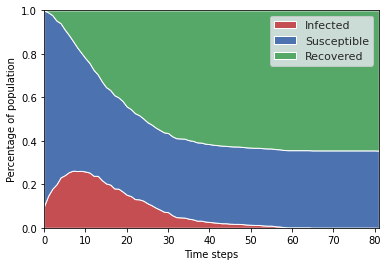

In [23]:
def virus_stackplot(data, ax):
    """ Stackplot of people's condition over time. """
    x = data.index.get_level_values('t')
    y = [data[var] for var in ['I', 'S', 'R']]

    sns.set()
    ax.stackplot(x, y, labels=['Infected', 'Susceptible', 'Recovered'],
                 colors = ['r', 'b', 'g'])

    ax.legend()
    ax.set_xlim(0, max(1, len(x)-1))
    ax.set_ylim(0, 1)
    ax.set_xlabel("Time steps")
    ax.set_ylabel("Percentage of population")

fig, ax = plt.subplots()
virus_stackplot(results.variables.VirusModel, ax)

### Creating an animation

We can also animate the model's dynamics as follows.
The function `animation_plot` takes a model instance 
and displays the previous stackplot together with a network graph. 
The function [`animate`](https://agentpy.readthedocs.io/en/latest/reference_analysis.html#agentpy.animate) will call this plot
function for every time-step and return an matplotlib animation object.

In [24]:
def animation_plot(m, axs):
    ax1, ax2 = axs
    ax1.set_title("Virus spread")
    ax2.set_title(f"Share infected: {m.I}")

    # Plot stackplot on first axis
    virus_stackplot(m.output.variables.VirusModel, ax1)

    # Plot network on second axis
    color_dict = {0:'b', 1:'r', 2:'g'}
    colors = [color_dict[c] for c in m.agents.condition]
    nx.draw_circular(m.network.graph, node_color=colors,
                     node_size=50, ax=ax2)

fig, axs = plt.subplots(1, 2, figsize=(8, 4)) # Prepare figure
parameters['population'] = 50 # Lower population for better visibility
animation = ap.animate(VirusModel(parameters), fig, axs, animation_plot)

Using Jupyter, we can display this animation directly in our notebook.

In [25]:
IPython.display.HTML(animation.to_jshtml()) 

### Multi-run experiment

To explore the effect of different parameter values, we use the classes `Sample`, `Range`, and `IntRange` to create a sample of different parameter combinations.

In [27]:
parameters = {
    'population': ap.IntRange(100, 1000),
    'infection_chance': ap.Range(0.1, 1.),
    'recovery_chance': ap.Range(0.1, 1.),
    'initial_infection_share': 0.1,
    'number_of_neighbors': 2,
    'network_randomness': ap.Range(0., 1.)
}

sample = ap.Sample(
    parameters,
    n=128,
    method='saltelli',
    calc_second_order=False
)

We then create an `Experiment` that takes a model and sample as input. [`Experiment.run()`](https://agentpy.readthedocs.io/en/latest/reference_experiments.html#agentpy.Experiment.run) runs our model repeatedly over the whole sample with ten random iterations per parameter combination.

In [28]:
exp = ap.Experiment(VirusModel, sample, iterations=10)
results = exp.run()

Scheduled runs: 7680
Completed: 7680, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:05:04.946903


Optionally, we can save and load our results as follows:

In [29]:
results.save()

Data saved to ap_output/VirusModel_4


In [30]:
results = ap.DataDict.load('VirusModel')

Loading from directory ap_output/VirusModel_4/
Loading parameters_constants.json - Successful
Loading parameters_sample.csv - Successful
Loading parameters_log.json - Successful
Loading reporters.csv - Successful
Loading info.json - Successful


The measures in our `DataDict` now hold one row for each simulation run.

In [31]:
results

DataDict {
'parameters': 
    'constants': Dictionary with 2 keys
    'sample': DataFrame with 4 variables and 768 rows
    'log': Dictionary with 5 keys
'reporters': DataFrame with 3 variables and 7680 rows
'info': Dictionary with 12 keys
}

We can use standard functions of the pandas library like 
`pandas.DataFrame.hist` to look at summary statistics.

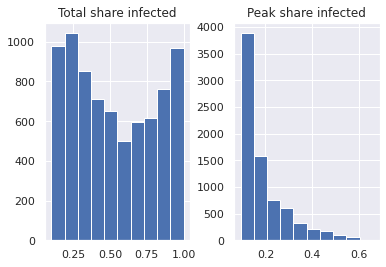

In [33]:
results.reporters.hist()
plt.show()

### Sensitivity analysis

[Sensitivity analysis](https://en.wikipedia.org/wiki/Sensitivity_analysis) can be used to understand how variations in a model's output relate to variations in the model's input parameters. Here, we calculate [Sobol Sensitivity Indices](https://salib.readthedocs.io/en/latest/api.html#sobol-sensitivity-analysis), which show us how much of the variance of each measure is caused by each varied parameter.
The function [`sensitivity_sobol`](https://agentpy.readthedocs.io/en/latest/reference_analysis.html#agentpy.sensitivity_sobol) uses the 
[SAlib](https://salib.readthedocs.io/en/latest/basics.html) package to calculate these indices
for the passed results and parameter ranges. 

In [34]:
results.calc_sobol()

DataDict {
'parameters': 
    'constants': Dictionary with 2 keys
    'sample': DataFrame with 4 variables and 768 rows
    'log': Dictionary with 5 keys
'reporters': DataFrame with 3 variables and 7680 rows
'info': Dictionary with 12 keys
'sensitivity': 
    'sobol': DataFrame with 2 variables and 8 rows
    'sobol_conf': DataFrame with 2 variables and 8 rows
}

This adds two new categories to our results:

- `sobol` returns first-order sobol sensitivity indices
- `sobol_conf` returns confidence ranges for the above indices

We can use pandas to create a bar plot that visualizes these sensitivity indices.

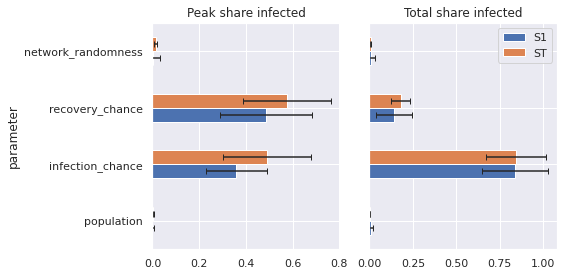

In [36]:
def plot_sobol(results):
    """ Bar plot of Sobol sensitivity indices. """

    sns.set()
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    si_list = results.sensitivity.sobol.groupby(by='reporter')
    si_conf_list = results.sensitivity.sobol_conf.groupby(by='reporter')

    for (key, si), (_, err), ax in zip(si_list, si_conf_list, axs):
        si = si.droplevel('reporter')
        err = err.droplevel('reporter')
        si.plot.barh(xerr=err, title=key, ax=ax, capsize = 3)
        ax.set_xlim(0)

    axs[0].get_legend().remove()
    axs[1].set(ylabel=None, yticklabels=[])
    axs[1].tick_params(left=False)
    plt.tight_layout()

plot_sobol(results)

Another way to visualize sensitivities is to plot the
average evaluation measures over our parameter variations. 
For this, we can use the [seaborn](https://seaborn.pydata.org/) for statistical data visualization. 

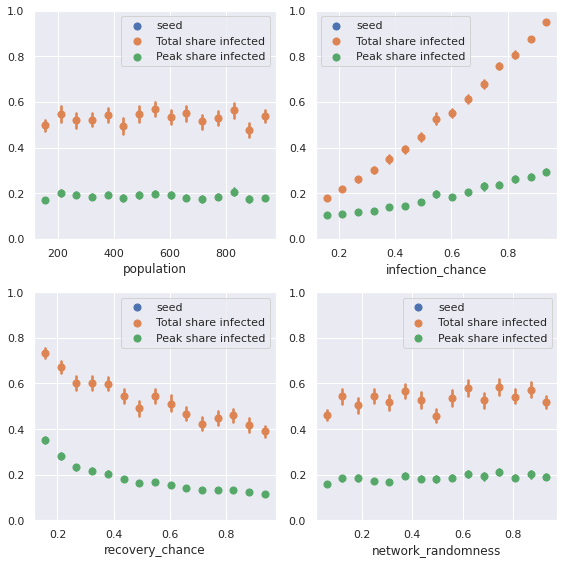

In [42]:
def plot_sensitivity(results):
    """ Show average simulation results for different parameter values. """

    sns.set()
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
    axs = [i for j in axs for i in j] # Flatten list

    data = results.arrange_reporters().astype('float')
    params = results.parameters.sample.keys()

    for x, ax in zip(params, axs):
        for y in results.reporters.columns:
            sns.regplot(x=x, y=y, data=data, ax=ax, ci=99,
                        x_bins=15, fit_reg=False, label=y)
        ax.set_ylim(0, 1)
        ax.set_ylabel('')
        ax.legend()

    plt.tight_layout()

plot_sensitivity(results)

### Exercises

If you want to experiment with this model further, here are some things you can try to do:

- Try out different kinds of [network generators](https://networkx.org/documentation/networkx-1.10/reference/generators.html)
- Implement a different infection process
- Allow agents to be re-infected after they recovered
- Implement a fourth condition: Vaccinated
- Implement a vaccination process at each time-step
- Make the vaccination speed dependent on a parameter
- Analyze the sensitivity of this parameter 

# 4. Conclusion

We have reached the end of this basic workshop on how to use the agentpy package. I hope you enjoyed it, and that everything was clear. If you have any feedback for improvements, please write to joel.foramitti@uab.cat. If you are interested to contribute, please check out this [guide](https://agentpy.readthedocs.io/en/latest/contributing.html).

Now you are ready to start building your own models! For inspiration, check out the `/notebooks` folder in this repository, which contains various guides and demonstration models. To read about all features, please visit the [documentation](https://agentpy.readthedocs.io/). And of course feel free to ask questions and share your models in the [discussion forum](https://github.com/JoelForamitti/agentpy/discussions).